In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib as mpl
import os
import catboost as cb
from collections import Counter

from IPython.core.pylabtools import figsize
from scipy import stats

In [2]:
#Getting Working Directory
os.getcwd()

#Setting style and font size for graphs
sns.set_style("whitegrid")
mpl.rcParams['font.size'] = 13

In [3]:
#load original data into dataframe
file ='df_clean2.csv'
df_clean2 = pd.read_csv(file)
df_clean2.shape

(100110, 44)

In [5]:
# Converting IDs to Object class
ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'visit_num' ]

df_clean2[ids] = df_clean2[ids].astype('object')

In [6]:
#Encoding Age. To retain the ordinal nature of age 
age_dict = {'[70-80)': 75,'[80-90)': 85, '[90-100)':100, '[60-70)': 65, '[50-60)': 55, '[40-50)': 45, '[30-40)':35,
           '[20-30)': 25, '[10-20)': 15, '[0-10)': 5}
df_clean2.age = df_clean2.age.map(age_dict)

#Target Variable Encoding. 'NO' as Not Readmitted and '>30' and '<30' as Readmitted. 
#Converting 3 class problem to a binary classification
readmitted_dict = {'NO': 0, '>30': 1, '<30': 1}
df_clean2.readmitted = df_clean2.readmitted.map(readmitted_dict)

#Identifying index of Categorical data
cat_index = [0,1,3,4,5,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]

In [7]:
#Creating our Feature and Target Data Set: X, y respectively

X = df_clean2.drop('readmitted', axis = 1)
y = df_clean2.readmitted

#Splitting Data into Training and Test Data Set
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [12]:
X_train.shape

(70077, 43)

There are two types of error, False Positive and False Negative. Predicting that a patient will not get readmitted but actually patient gets readmitted. This is false negative. Predicting that a patient will get readmitted but in actually he will not os called false positive. For an hospital, a false negative error is not desirable. They can still live with a false positive error. So in below models we will look at reducing false negative error. 

High Recall for class 'Readmitted', Better the model


Ensuring that we have the same fractions of all class in both train and test data set. Let's Calculate the fraction

### CatBoost Classifier

In [8]:
# Base Line Evaluation
from sklearn.metrics import classification_report, balanced_accuracy_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support,log_loss
class_names = ['Not Readmitted', 'Readmitted']

In [9]:
def auc_curve(y_test,y_pred_test,auc_test):
    fpr,tpr, threshold = roc_curve(y_test, y_pred_test)
    _ = plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' %auc_test )
    _ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    _ = plt.xlim([0.0, 1.0])
    _ = plt.ylim([0.0, 1.05])
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic example')
    _ = plt.legend(loc="lower right")


In [10]:
cb_clf = cb.CatBoostClassifier(random_state = 42)
cb_clf.fit(X_train, y_train, cat_features= cat_index)

Learning rate set to 0.06324
0:	learn: 0.6883333	total: 467ms	remaining: 7m 46s
1:	learn: 0.6839610	total: 767ms	remaining: 6m 22s
2:	learn: 0.6798069	total: 1.14s	remaining: 6m 18s
3:	learn: 0.6762059	total: 1.44s	remaining: 5m 57s
4:	learn: 0.6731299	total: 1.77s	remaining: 5m 52s
5:	learn: 0.6701731	total: 2.08s	remaining: 5m 43s
6:	learn: 0.6675427	total: 2.39s	remaining: 5m 39s
7:	learn: 0.6652726	total: 2.69s	remaining: 5m 34s
8:	learn: 0.6631928	total: 2.97s	remaining: 5m 27s
9:	learn: 0.6612436	total: 3.28s	remaining: 5m 24s
10:	learn: 0.6595870	total: 3.6s	remaining: 5m 23s
11:	learn: 0.6580630	total: 3.89s	remaining: 5m 20s
12:	learn: 0.6568270	total: 4.19s	remaining: 5m 18s
13:	learn: 0.6555553	total: 4.48s	remaining: 5m 15s
14:	learn: 0.6545244	total: 4.77s	remaining: 5m 13s
15:	learn: 0.6535149	total: 5.06s	remaining: 5m 11s
16:	learn: 0.6525872	total: 5.37s	remaining: 5m 10s
17:	learn: 0.6518069	total: 5.65s	remaining: 5m 8s
18:	learn: 0.6509596	total: 5.94s	remaining: 5m

158:	learn: 0.6283927	total: 48.6s	remaining: 4m 17s
159:	learn: 0.6282514	total: 49s	remaining: 4m 17s
160:	learn: 0.6282155	total: 49.3s	remaining: 4m 17s
161:	learn: 0.6281512	total: 49.7s	remaining: 4m 17s
162:	learn: 0.6281071	total: 50s	remaining: 4m 16s
163:	learn: 0.6280585	total: 50.4s	remaining: 4m 16s
164:	learn: 0.6279709	total: 50.7s	remaining: 4m 16s
165:	learn: 0.6279423	total: 51s	remaining: 4m 16s
166:	learn: 0.6278950	total: 51.4s	remaining: 4m 16s
167:	learn: 0.6278008	total: 51.7s	remaining: 4m 16s
168:	learn: 0.6277653	total: 52s	remaining: 4m 15s
169:	learn: 0.6276776	total: 52.4s	remaining: 4m 15s
170:	learn: 0.6276481	total: 52.7s	remaining: 4m 15s
171:	learn: 0.6275980	total: 53.1s	remaining: 4m 15s
172:	learn: 0.6274714	total: 53.4s	remaining: 4m 15s
173:	learn: 0.6273756	total: 53.7s	remaining: 4m 14s
174:	learn: 0.6273067	total: 54s	remaining: 4m 14s
175:	learn: 0.6272529	total: 54.4s	remaining: 4m 14s
176:	learn: 0.6272033	total: 54.6s	remaining: 4m 14s
177

313:	learn: 0.6186817	total: 1m 40s	remaining: 3m 39s
314:	learn: 0.6186222	total: 1m 40s	remaining: 3m 39s
315:	learn: 0.6185861	total: 1m 41s	remaining: 3m 38s
316:	learn: 0.6185264	total: 1m 41s	remaining: 3m 38s
317:	learn: 0.6185119	total: 1m 41s	remaining: 3m 38s
318:	learn: 0.6184671	total: 1m 42s	remaining: 3m 37s
319:	learn: 0.6184281	total: 1m 42s	remaining: 3m 37s
320:	learn: 0.6183676	total: 1m 42s	remaining: 3m 37s
321:	learn: 0.6183228	total: 1m 43s	remaining: 3m 37s
322:	learn: 0.6182524	total: 1m 43s	remaining: 3m 36s
323:	learn: 0.6182074	total: 1m 43s	remaining: 3m 36s
324:	learn: 0.6181934	total: 1m 44s	remaining: 3m 36s
325:	learn: 0.6181919	total: 1m 44s	remaining: 3m 35s
326:	learn: 0.6181516	total: 1m 44s	remaining: 3m 35s
327:	learn: 0.6180972	total: 1m 45s	remaining: 3m 35s
328:	learn: 0.6180386	total: 1m 45s	remaining: 3m 35s
329:	learn: 0.6180153	total: 1m 45s	remaining: 3m 34s
330:	learn: 0.6179767	total: 1m 46s	remaining: 3m 34s
331:	learn: 0.6179056	total:

467:	learn: 0.6126026	total: 2m 31s	remaining: 2m 52s
468:	learn: 0.6125741	total: 2m 32s	remaining: 2m 52s
469:	learn: 0.6125439	total: 2m 32s	remaining: 2m 51s
470:	learn: 0.6125222	total: 2m 32s	remaining: 2m 51s
471:	learn: 0.6124559	total: 2m 33s	remaining: 2m 51s
472:	learn: 0.6124021	total: 2m 33s	remaining: 2m 51s
473:	learn: 0.6123949	total: 2m 33s	remaining: 2m 50s
474:	learn: 0.6123771	total: 2m 34s	remaining: 2m 50s
475:	learn: 0.6123490	total: 2m 34s	remaining: 2m 50s
476:	learn: 0.6123088	total: 2m 34s	remaining: 2m 49s
477:	learn: 0.6122735	total: 2m 35s	remaining: 2m 49s
478:	learn: 0.6122479	total: 2m 35s	remaining: 2m 49s
479:	learn: 0.6122075	total: 2m 35s	remaining: 2m 48s
480:	learn: 0.6121668	total: 2m 36s	remaining: 2m 48s
481:	learn: 0.6121531	total: 2m 36s	remaining: 2m 48s
482:	learn: 0.6121197	total: 2m 36s	remaining: 2m 47s
483:	learn: 0.6120821	total: 2m 37s	remaining: 2m 47s
484:	learn: 0.6120532	total: 2m 37s	remaining: 2m 47s
485:	learn: 0.6120371	total:

620:	learn: 0.6080676	total: 3m 21s	remaining: 2m 3s
621:	learn: 0.6080333	total: 3m 22s	remaining: 2m 2s
622:	learn: 0.6079893	total: 3m 22s	remaining: 2m 2s
623:	learn: 0.6079682	total: 3m 22s	remaining: 2m 2s
624:	learn: 0.6079569	total: 3m 23s	remaining: 2m 1s
625:	learn: 0.6079277	total: 3m 23s	remaining: 2m 1s
626:	learn: 0.6079073	total: 3m 23s	remaining: 2m 1s
627:	learn: 0.6078592	total: 3m 24s	remaining: 2m
628:	learn: 0.6078336	total: 3m 24s	remaining: 2m
629:	learn: 0.6077811	total: 3m 24s	remaining: 2m
630:	learn: 0.6077716	total: 3m 24s	remaining: 1m 59s
631:	learn: 0.6077492	total: 3m 25s	remaining: 1m 59s
632:	learn: 0.6077329	total: 3m 25s	remaining: 1m 59s
633:	learn: 0.6077286	total: 3m 25s	remaining: 1m 58s
634:	learn: 0.6076994	total: 3m 26s	remaining: 1m 58s
635:	learn: 0.6076873	total: 3m 26s	remaining: 1m 58s
636:	learn: 0.6076690	total: 3m 26s	remaining: 1m 57s
637:	learn: 0.6076517	total: 3m 27s	remaining: 1m 57s
638:	learn: 0.6076330	total: 3m 27s	remaining: 

773:	learn: 0.6038950	total: 4m 12s	remaining: 1m 13s
774:	learn: 0.6038662	total: 4m 12s	remaining: 1m 13s
775:	learn: 0.6038372	total: 4m 12s	remaining: 1m 12s
776:	learn: 0.6038331	total: 4m 13s	remaining: 1m 12s
777:	learn: 0.6038305	total: 4m 13s	remaining: 1m 12s
778:	learn: 0.6038246	total: 4m 13s	remaining: 1m 11s
779:	learn: 0.6038243	total: 4m 14s	remaining: 1m 11s
780:	learn: 0.6037981	total: 4m 14s	remaining: 1m 11s
781:	learn: 0.6037845	total: 4m 14s	remaining: 1m 11s
782:	learn: 0.6037798	total: 4m 15s	remaining: 1m 10s
783:	learn: 0.6037416	total: 4m 15s	remaining: 1m 10s
784:	learn: 0.6037160	total: 4m 15s	remaining: 1m 10s
785:	learn: 0.6036833	total: 4m 16s	remaining: 1m 9s
786:	learn: 0.6036650	total: 4m 16s	remaining: 1m 9s
787:	learn: 0.6035816	total: 4m 16s	remaining: 1m 9s
788:	learn: 0.6035409	total: 4m 17s	remaining: 1m 8s
789:	learn: 0.6035238	total: 4m 17s	remaining: 1m 8s
790:	learn: 0.6035110	total: 4m 17s	remaining: 1m 8s
791:	learn: 0.6035045	total: 4m 17

929:	learn: 0.6000035	total: 5m 3s	remaining: 22.8s
930:	learn: 0.5999679	total: 5m 3s	remaining: 22.5s
931:	learn: 0.5999401	total: 5m 4s	remaining: 22.2s
932:	learn: 0.5998982	total: 5m 4s	remaining: 21.9s
933:	learn: 0.5998551	total: 5m 4s	remaining: 21.5s
934:	learn: 0.5998403	total: 5m 5s	remaining: 21.2s
935:	learn: 0.5998119	total: 5m 5s	remaining: 20.9s
936:	learn: 0.5997620	total: 5m 5s	remaining: 20.6s
937:	learn: 0.5997589	total: 5m 6s	remaining: 20.2s
938:	learn: 0.5997362	total: 5m 6s	remaining: 19.9s
939:	learn: 0.5997276	total: 5m 6s	remaining: 19.6s
940:	learn: 0.5997046	total: 5m 7s	remaining: 19.2s
941:	learn: 0.5996669	total: 5m 7s	remaining: 18.9s
942:	learn: 0.5996335	total: 5m 7s	remaining: 18.6s
943:	learn: 0.5995729	total: 5m 8s	remaining: 18.3s
944:	learn: 0.5995403	total: 5m 8s	remaining: 17.9s
945:	learn: 0.5995244	total: 5m 8s	remaining: 17.6s
946:	learn: 0.5995043	total: 5m 9s	remaining: 17.3s
947:	learn: 0.5995028	total: 5m 9s	remaining: 17s
948:	learn: 0.

In [172]:
cb_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorde

Training accuracy: 0.6661
Test accuracy    : 0.6401
Training AUC Score: 0.7274
Testing AUC Score: 0.6912
Classification Report - Training
              precision    recall  f1-score   support

           0       0.66      0.75      0.71     37271
           1       0.67      0.57      0.61     32806

    accuracy                           0.67     70077
   macro avg       0.67      0.66      0.66     70077
weighted avg       0.67      0.67      0.66     70077

Classification Report - Testing
                precision    recall  f1-score   support

Not Readmitted       0.64      0.73      0.68     15937
    Readmitted       0.64      0.54      0.58     14096

      accuracy                           0.64     30033
     macro avg       0.64      0.63      0.63     30033
  weighted avg       0.64      0.64      0.64     30033



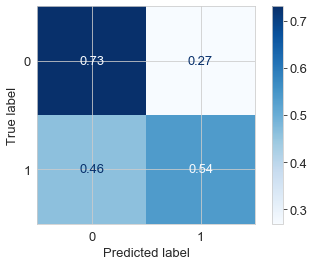

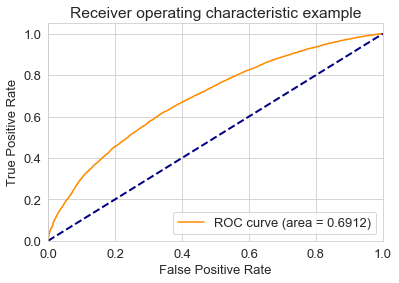

In [13]:
# Base Line Evaluation

#Predicting for testing and trainig data sets
y_test_proba = cb_clf.predict_proba(X_test)[:,1]
y_train_proba = cb_clf.predict_proba(X_train)[:,1]

y_pred_test = cb_clf.predict(X_test)
y_pred_train = cb_clf.predict(X_train)

    #Accuracy Score
print("Training accuracy: %0.4f" %cb_clf.score(X_train, y_train))
print("Test accuracy    : %0.4f" %cb_clf.score(X_test, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(cb_clf, X_test, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)


In [174]:
#coefficients = xg.feature_importances_
coefficients = cb_clf.feature_importances_
coef = pd.DataFrame(coefficients, index = X_train.columns, columns = ['Feature Importance'])
coef.sort_values('Feature Importance', ascending = False, inplace = True)
print("Top 5:")
print(coef[:11])



Top 5:
                          Feature Importance
number_inpatient                   10.469489
num_lab_procedures                  6.490526
age                                 6.085003
number_diagnoses                    5.908610
discharge_disposition_id            5.905719
num_medications                     5.809407
admission_source_id                 5.495908
diag_1                              5.271964
admission_type_id                   4.307580
visit_num                           3.976391
diag_2                              3.831989


#### Post Standardization 

In [14]:
# Pre-processing: Standardization numeric variables
pd.options.mode.chained_assignment = None 
from sklearn.preprocessing import MinMaxScaler

numeric_col = df_clean2.select_dtypes(exclude = 'object') \
                .drop(['readmitted'], axis = 1).columns

def standardize(train,test, feature_name):
    for col in feature_name:
        mean = train[col].mean()
        sd = train[col].std()
        train[col] = (train[col] - mean)/sd
        test[col] = (test[col] - mean)/sd

    return train, test



numeric_train = X_train[numeric_col]
numeric_test = X_test[numeric_col]

scale = MinMaxScaler()
scale.fit(numeric_train)

numeric_train_sc = scale.transform(numeric_train)
numeric_test_sc = scale.transform(numeric_test)

numeric_train_sc = pd.DataFrame(numeric_train_sc, columns = numeric_col)
tf_train = X_train.drop(numeric_col, axis= 1).reset_index()
X_train_sc = pd.concat([tf_train,numeric_train_sc],axis=1)
X_train_sc.set_index('index',inplace = True)
#print(X_train.shape)
#print(X_train_sc.shape)

numeric_test_sc = pd.DataFrame(numeric_test_sc, columns = numeric_col)
tf_test = X_test.drop(numeric_col, axis= 1).reset_index()
X_test_sc = pd.concat([tf_test,numeric_test_sc],axis=1)
X_test_sc.set_index('index',inplace = True)
#print(X_test.shape)
#print(X_test_sc.describe())

Learning rate set to 0.06324
0:	learn: 0.6883333	total: 332ms	remaining: 5m 31s
1:	learn: 0.6839610	total: 662ms	remaining: 5m 30s
2:	learn: 0.6798069	total: 1.02s	remaining: 5m 40s
3:	learn: 0.6762059	total: 1.35s	remaining: 5m 35s
4:	learn: 0.6731299	total: 1.72s	remaining: 5m 41s
5:	learn: 0.6701731	total: 2.05s	remaining: 5m 39s
6:	learn: 0.6675427	total: 2.39s	remaining: 5m 38s
7:	learn: 0.6652726	total: 2.71s	remaining: 5m 36s
8:	learn: 0.6631928	total: 3s	remaining: 5m 30s
9:	learn: 0.6612436	total: 3.31s	remaining: 5m 27s
10:	learn: 0.6595870	total: 3.62s	remaining: 5m 25s
11:	learn: 0.6580630	total: 3.92s	remaining: 5m 22s
12:	learn: 0.6568270	total: 4.24s	remaining: 5m 21s
13:	learn: 0.6555553	total: 4.54s	remaining: 5m 19s
14:	learn: 0.6545244	total: 4.85s	remaining: 5m 18s
15:	learn: 0.6535149	total: 5.13s	remaining: 5m 15s
16:	learn: 0.6525872	total: 5.44s	remaining: 5m 14s
17:	learn: 0.6518069	total: 5.72s	remaining: 5m 12s
18:	learn: 0.6509596	total: 6.01s	remaining: 5m 

157:	learn: 0.6284563	total: 48.8s	remaining: 4m 19s
158:	learn: 0.6283927	total: 49.1s	remaining: 4m 19s
159:	learn: 0.6282514	total: 49.5s	remaining: 4m 19s
160:	learn: 0.6282155	total: 49.8s	remaining: 4m 19s
161:	learn: 0.6281512	total: 50.1s	remaining: 4m 19s
162:	learn: 0.6281071	total: 50.5s	remaining: 4m 19s
163:	learn: 0.6280585	total: 50.8s	remaining: 4m 19s
164:	learn: 0.6279709	total: 51.2s	remaining: 4m 18s
165:	learn: 0.6279423	total: 51.5s	remaining: 4m 18s
166:	learn: 0.6278950	total: 51.8s	remaining: 4m 18s
167:	learn: 0.6278008	total: 52.2s	remaining: 4m 18s
168:	learn: 0.6277653	total: 52.5s	remaining: 4m 18s
169:	learn: 0.6276776	total: 52.8s	remaining: 4m 18s
170:	learn: 0.6276481	total: 53.2s	remaining: 4m 17s
171:	learn: 0.6275980	total: 53.5s	remaining: 4m 17s
172:	learn: 0.6274714	total: 53.8s	remaining: 4m 17s
173:	learn: 0.6273756	total: 54.1s	remaining: 4m 16s
174:	learn: 0.6273067	total: 54.4s	remaining: 4m 16s
175:	learn: 0.6272529	total: 54.7s	remaining: 

312:	learn: 0.6187077	total: 1m 36s	remaining: 3m 32s
313:	learn: 0.6186817	total: 1m 37s	remaining: 3m 32s
314:	learn: 0.6186222	total: 1m 37s	remaining: 3m 31s
315:	learn: 0.6185861	total: 1m 37s	remaining: 3m 31s
316:	learn: 0.6185264	total: 1m 38s	remaining: 3m 31s
317:	learn: 0.6185119	total: 1m 38s	remaining: 3m 30s
318:	learn: 0.6184671	total: 1m 38s	remaining: 3m 30s
319:	learn: 0.6184281	total: 1m 38s	remaining: 3m 30s
320:	learn: 0.6183676	total: 1m 39s	remaining: 3m 29s
321:	learn: 0.6183228	total: 1m 39s	remaining: 3m 29s
322:	learn: 0.6182524	total: 1m 39s	remaining: 3m 29s
323:	learn: 0.6182074	total: 1m 40s	remaining: 3m 29s
324:	learn: 0.6181934	total: 1m 40s	remaining: 3m 28s
325:	learn: 0.6181919	total: 1m 40s	remaining: 3m 28s
326:	learn: 0.6181516	total: 1m 40s	remaining: 3m 27s
327:	learn: 0.6180972	total: 1m 41s	remaining: 3m 27s
328:	learn: 0.6180386	total: 1m 41s	remaining: 3m 27s
329:	learn: 0.6180153	total: 1m 41s	remaining: 3m 27s
330:	learn: 0.6179767	total:

466:	learn: 0.6126322	total: 2m 24s	remaining: 2m 44s
467:	learn: 0.6126026	total: 2m 24s	remaining: 2m 44s
468:	learn: 0.6125741	total: 2m 24s	remaining: 2m 44s
469:	learn: 0.6125439	total: 2m 25s	remaining: 2m 43s
470:	learn: 0.6125222	total: 2m 25s	remaining: 2m 43s
471:	learn: 0.6124559	total: 2m 25s	remaining: 2m 43s
472:	learn: 0.6124021	total: 2m 26s	remaining: 2m 42s
473:	learn: 0.6123949	total: 2m 26s	remaining: 2m 42s
474:	learn: 0.6123771	total: 2m 26s	remaining: 2m 42s
475:	learn: 0.6123490	total: 2m 27s	remaining: 2m 42s
476:	learn: 0.6123088	total: 2m 27s	remaining: 2m 41s
477:	learn: 0.6122735	total: 2m 27s	remaining: 2m 41s
478:	learn: 0.6122479	total: 2m 27s	remaining: 2m 40s
479:	learn: 0.6122075	total: 2m 28s	remaining: 2m 40s
480:	learn: 0.6121668	total: 2m 28s	remaining: 2m 40s
481:	learn: 0.6121531	total: 2m 28s	remaining: 2m 40s
482:	learn: 0.6121197	total: 2m 29s	remaining: 2m 39s
483:	learn: 0.6120821	total: 2m 29s	remaining: 2m 39s
484:	learn: 0.6120532	total:

620:	learn: 0.6080676	total: 3m 11s	remaining: 1m 56s
621:	learn: 0.6080333	total: 3m 11s	remaining: 1m 56s
622:	learn: 0.6079893	total: 3m 12s	remaining: 1m 56s
623:	learn: 0.6079682	total: 3m 12s	remaining: 1m 55s
624:	learn: 0.6079569	total: 3m 12s	remaining: 1m 55s
625:	learn: 0.6079277	total: 3m 13s	remaining: 1m 55s
626:	learn: 0.6079073	total: 3m 13s	remaining: 1m 55s
627:	learn: 0.6078592	total: 3m 13s	remaining: 1m 54s
628:	learn: 0.6078336	total: 3m 14s	remaining: 1m 54s
629:	learn: 0.6077811	total: 3m 14s	remaining: 1m 54s
630:	learn: 0.6077716	total: 3m 14s	remaining: 1m 53s
631:	learn: 0.6077492	total: 3m 15s	remaining: 1m 53s
632:	learn: 0.6077329	total: 3m 15s	remaining: 1m 53s
633:	learn: 0.6077286	total: 3m 15s	remaining: 1m 52s
634:	learn: 0.6076994	total: 3m 15s	remaining: 1m 52s
635:	learn: 0.6076873	total: 3m 16s	remaining: 1m 52s
636:	learn: 0.6076690	total: 3m 16s	remaining: 1m 52s
637:	learn: 0.6076517	total: 3m 16s	remaining: 1m 51s
638:	learn: 0.6076330	total:

772:	learn: 0.6039162	total: 4m	remaining: 1m 10s
773:	learn: 0.6038950	total: 4m	remaining: 1m 10s
774:	learn: 0.6038662	total: 4m 1s	remaining: 1m 9s
775:	learn: 0.6038372	total: 4m 1s	remaining: 1m 9s
776:	learn: 0.6038331	total: 4m 1s	remaining: 1m 9s
777:	learn: 0.6038305	total: 4m 2s	remaining: 1m 9s
778:	learn: 0.6038246	total: 4m 2s	remaining: 1m 8s
779:	learn: 0.6038243	total: 4m 2s	remaining: 1m 8s
780:	learn: 0.6037981	total: 4m 3s	remaining: 1m 8s
781:	learn: 0.6037845	total: 4m 3s	remaining: 1m 7s
782:	learn: 0.6037798	total: 4m 3s	remaining: 1m 7s
783:	learn: 0.6037416	total: 4m 4s	remaining: 1m 7s
784:	learn: 0.6037160	total: 4m 4s	remaining: 1m 6s
785:	learn: 0.6036833	total: 4m 4s	remaining: 1m 6s
786:	learn: 0.6036650	total: 4m 4s	remaining: 1m 6s
787:	learn: 0.6035816	total: 4m 5s	remaining: 1m 5s
788:	learn: 0.6035409	total: 4m 5s	remaining: 1m 5s
789:	learn: 0.6035238	total: 4m 5s	remaining: 1m 5s
790:	learn: 0.6035110	total: 4m 6s	remaining: 1m 5s
791:	learn: 0.60

928:	learn: 0.6000172	total: 4m 49s	remaining: 22.2s
929:	learn: 0.6000035	total: 4m 50s	remaining: 21.8s
930:	learn: 0.5999679	total: 4m 50s	remaining: 21.5s
931:	learn: 0.5999401	total: 4m 50s	remaining: 21.2s
932:	learn: 0.5998982	total: 4m 51s	remaining: 20.9s
933:	learn: 0.5998551	total: 4m 51s	remaining: 20.6s
934:	learn: 0.5998403	total: 4m 51s	remaining: 20.3s
935:	learn: 0.5998119	total: 4m 52s	remaining: 20s
936:	learn: 0.5997620	total: 4m 52s	remaining: 19.7s
937:	learn: 0.5997589	total: 4m 52s	remaining: 19.3s
938:	learn: 0.5997362	total: 4m 53s	remaining: 19s
939:	learn: 0.5997276	total: 4m 53s	remaining: 18.7s
940:	learn: 0.5997046	total: 4m 53s	remaining: 18.4s
941:	learn: 0.5996669	total: 4m 53s	remaining: 18.1s
942:	learn: 0.5996335	total: 4m 54s	remaining: 17.8s
943:	learn: 0.5995729	total: 4m 54s	remaining: 17.5s
944:	learn: 0.5995403	total: 4m 55s	remaining: 17.2s
945:	learn: 0.5995244	total: 4m 55s	remaining: 16.9s
946:	learn: 0.5995043	total: 4m 55s	remaining: 16.

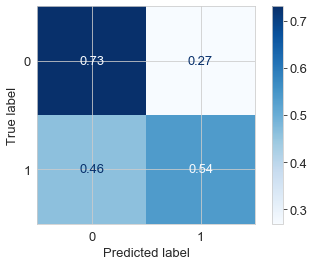

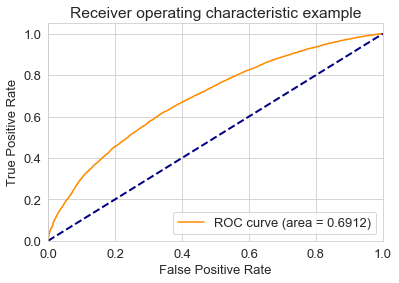

In [15]:

cat_index_t = list(range(0,34))
cb_clf = cb.CatBoostClassifier(random_state = 42)
cb_clf.fit(X_train_sc, y_train, cat_features= cat_index_t)

#Predicting for testing and trainig data sets
y_test_proba = cb_clf.predict_proba(X_test_sc)[:,1]
y_train_proba = cb_clf.predict_proba(X_train_sc)[:,1]

y_pred_test = cb_clf.predict(X_test_sc)
y_pred_train = cb_clf.predict(X_train_sc)

    #Accuracy Score
print("Training accuracy: %0.4f" %cb_clf.score(X_train_sc, y_train))
print("Test accuracy    : %0.4f" %cb_clf.score(X_test_sc, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, xg.predict_proba(X_train_sc)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(cb_clf, X_test_sc, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)


In [155]:
def cb_tuning(X_train, X_test, para, index):
      
    cb_clf = cb.CatBoostClassifier(random_state = 42, subsample = para,  n_estimators = 750, 
                                   min_data_in_leaf = 1, max_depth = 6, rsm  = 0.6, learning_rate = 0.06, 
                                   verbose = 0, one_hot_max_size = 9)
                                   
    cb_clf.fit(X_train,y_train, cat_features= index)

    y_pred_test = cb_clf.predict(X_test)
    y_pred_train = cb_clf.predict(X_train)
    
    y_test_proba = cb_clf.predict_proba(X_test_sc)[:,1]
    y_train_proba = cb_clf.predict_proba(X_train_sc)[:,1]


    #Accuracy Score
    loss_train = log_loss(y_train, cb_clf.predict_proba(X_train))
    loss_test = log_loss(y_test, cb_clf.predict_proba(X_test))
    #auc_train = roc_auc_score(y_train,y_train_proba)
    #auc_test = roc_auc_score(y_test,y_test_proba)
    
    return loss_train, loss_test
    #return auc_train, auc_test

### Hyper-parameter Tuning

0.2
0.3
0.4
0.5
0.6
0.8
0.9
1


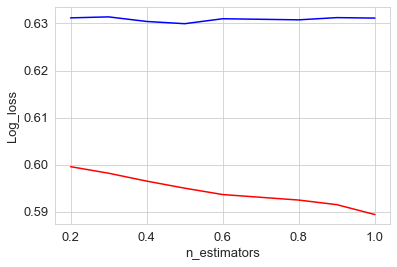

In [158]:
from sklearn.model_selection import GridSearchCV

one_hot_max_size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
min_data_in_leaf = [1, 3, 0.1, 0.3]
learning_rate = [0.03, 0.05, 0.1, 0.2] # default 0.1 
max_depth = [2, 5, 10, 15]
n_estimators = [500, 600, 700, 750, 800, 900, 1000] # default 100
subsample = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8 , 0.9, 1]
l2_leaf_reg = [0.1 , 0.5, 1, 5, 10, 20, 50, 100]

train_loss = []
test_loss  = []

for i in subsample:
    print(i)
    train, test = cb_tuning(X_train_sc, X_test_sc, i, cat_index_t)
    train_loss.append(train)
    test_loss.append(test)

_ = plt.plot(subsample, train_loss, 'r', label = 'Training')
_ = plt.plot(subsample, test_loss, 'b', label = 'Test')
_ = plt.xlabel('n_estimators')
_ = plt.ylabel('Log_loss')


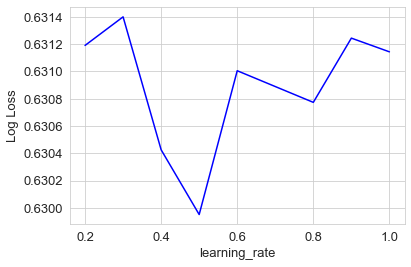

In [159]:
#_ = plt.plot(n_trees, train_auc, 'r', label = 'Training')
_ = plt.plot(subsample, test_loss, 'b', label = 'Test')
_ = plt.xlabel('learning_rate')
_ = plt.ylabel('Log Loss')


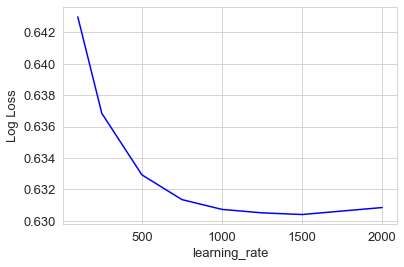

In [133]:
#_ = plt.plot(n_trees, train_auc, 'r', label = 'Training')
_ = plt.plot(n_estimators, test_loss, 'b', label = 'Test')
_ = plt.xlabel('learning_rate')
_ = plt.ylabel('Log Loss')


In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

params = {
    #"gamma": uniform(0.03, 0.3),
    "max_depth": [5, 6, 7], # default 3
    #'min_data_in_leaf' : [3, 4, 6, 10],
    'rsm': [0.5, 0.6, 0.7],
    'subsample': [0.4, 0.5, 0.7, 0.8],
    'l2_leaf_reg' : [5, 15, 20, 25]
    #'one_hot_max_size' : [1, 2, 3, 4, 5, 9]
}

cb_clf = cb.CatBoostClassifier(random_state = 42, min_data_in_leaf = 1, 
                               verbose = 1, one_hot_max_size = 9, learning_rate = 0.06, 
                               cat_features= cat_index_t, n_estimators = 750)
#cv = RandomizedSearchCV(xg, param_distributions=params, random_state=42, 
#                        n_iter=200, cv=5, verbose=2, n_jobs=4, scoring = 'neg_log_loss')

cv = GridSearchCV(cb_clf, param_grid=params, cv=5, verbose=2, n_jobs=4, scoring = 'roc_auc')

cv.fit(X_train_sc,y_train)

print(cv.best_params_)
print(cv.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 37.7min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 85.6min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 161.4min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed: 186.5min finished


0:	learn: 0.6881443	total: 38.7ms	remaining: 29s
1:	learn: 0.6836057	total: 61.9ms	remaining: 23.2s
2:	learn: 0.6798257	total: 87.2ms	remaining: 21.7s
3:	learn: 0.6765531	total: 105ms	remaining: 19.6s
4:	learn: 0.6734150	total: 124ms	remaining: 18.4s
5:	learn: 0.6706243	total: 144ms	remaining: 17.8s
6:	learn: 0.6682969	total: 163ms	remaining: 17.3s
7:	learn: 0.6661204	total: 184ms	remaining: 17.1s
8:	learn: 0.6640831	total: 201ms	remaining: 16.6s
9:	learn: 0.6624779	total: 218ms	remaining: 16.1s
10:	learn: 0.6609824	total: 239ms	remaining: 16s
11:	learn: 0.6594645	total: 256ms	remaining: 15.8s
12:	learn: 0.6580127	total: 275ms	remaining: 15.6s
13:	learn: 0.6568332	total: 294ms	remaining: 15.5s
14:	learn: 0.6557601	total: 315ms	remaining: 15.4s
15:	learn: 0.6547304	total: 331ms	remaining: 15.2s
16:	learn: 0.6537188	total: 352ms	remaining: 15.2s
17:	learn: 0.6528316	total: 370ms	remaining: 15s
18:	learn: 0.6520638	total: 386ms	remaining: 14.9s
19:	learn: 0.6513003	total: 404ms	remaining:

167:	learn: 0.6281513	total: 3s	remaining: 10.4s
168:	learn: 0.6280422	total: 3.02s	remaining: 10.4s
169:	learn: 0.6279793	total: 3.03s	remaining: 10.3s
170:	learn: 0.6279081	total: 3.05s	remaining: 10.3s
171:	learn: 0.6278505	total: 3.07s	remaining: 10.3s
172:	learn: 0.6277925	total: 3.08s	remaining: 10.3s
173:	learn: 0.6277219	total: 3.1s	remaining: 10.3s
174:	learn: 0.6276334	total: 3.12s	remaining: 10.3s
175:	learn: 0.6276035	total: 3.14s	remaining: 10.2s
176:	learn: 0.6275111	total: 3.15s	remaining: 10.2s
177:	learn: 0.6274585	total: 3.17s	remaining: 10.2s
178:	learn: 0.6273848	total: 3.19s	remaining: 10.2s
179:	learn: 0.6273174	total: 3.21s	remaining: 10.2s
180:	learn: 0.6272911	total: 3.24s	remaining: 10.2s
181:	learn: 0.6272344	total: 3.25s	remaining: 10.2s
182:	learn: 0.6271475	total: 3.27s	remaining: 10.1s
183:	learn: 0.6270932	total: 3.3s	remaining: 10.2s
184:	learn: 0.6270188	total: 3.32s	remaining: 10.1s
185:	learn: 0.6269344	total: 3.34s	remaining: 10.1s
186:	learn: 0.626

335:	learn: 0.6163865	total: 5.95s	remaining: 7.33s
336:	learn: 0.6163065	total: 5.97s	remaining: 7.31s
337:	learn: 0.6162462	total: 5.98s	remaining: 7.29s
338:	learn: 0.6161845	total: 6s	remaining: 7.28s
339:	learn: 0.6161272	total: 6.02s	remaining: 7.26s
340:	learn: 0.6160244	total: 6.04s	remaining: 7.24s
341:	learn: 0.6159834	total: 6.05s	remaining: 7.22s
342:	learn: 0.6159082	total: 6.07s	remaining: 7.2s
343:	learn: 0.6158571	total: 6.09s	remaining: 7.18s
344:	learn: 0.6157886	total: 6.11s	remaining: 7.17s
345:	learn: 0.6157214	total: 6.12s	remaining: 7.15s
346:	learn: 0.6157190	total: 6.14s	remaining: 7.13s
347:	learn: 0.6156766	total: 6.16s	remaining: 7.11s
348:	learn: 0.6156256	total: 6.17s	remaining: 7.09s
349:	learn: 0.6155886	total: 6.2s	remaining: 7.08s
350:	learn: 0.6155433	total: 6.21s	remaining: 7.06s
351:	learn: 0.6154808	total: 6.23s	remaining: 7.04s
352:	learn: 0.6154360	total: 6.25s	remaining: 7.03s
353:	learn: 0.6153937	total: 6.26s	remaining: 7s
354:	learn: 0.615366

503:	learn: 0.6080607	total: 8.93s	remaining: 4.36s
504:	learn: 0.6080164	total: 8.94s	remaining: 4.34s
505:	learn: 0.6079458	total: 8.96s	remaining: 4.32s
506:	learn: 0.6079023	total: 8.98s	remaining: 4.3s
507:	learn: 0.6078743	total: 9s	remaining: 4.29s
508:	learn: 0.6078388	total: 9.01s	remaining: 4.27s
509:	learn: 0.6077773	total: 9.03s	remaining: 4.25s
510:	learn: 0.6077339	total: 9.05s	remaining: 4.23s
511:	learn: 0.6076933	total: 9.07s	remaining: 4.21s
512:	learn: 0.6076241	total: 9.09s	remaining: 4.2s
513:	learn: 0.6076191	total: 9.1s	remaining: 4.18s
514:	learn: 0.6075558	total: 9.12s	remaining: 4.16s
515:	learn: 0.6074993	total: 9.14s	remaining: 4.14s
516:	learn: 0.6074670	total: 9.15s	remaining: 4.13s
517:	learn: 0.6074134	total: 9.17s	remaining: 4.11s
518:	learn: 0.6073765	total: 9.2s	remaining: 4.09s
519:	learn: 0.6073445	total: 9.21s	remaining: 4.07s
520:	learn: 0.6073145	total: 9.23s	remaining: 4.06s
521:	learn: 0.6072685	total: 9.25s	remaining: 4.04s
522:	learn: 0.60721

670:	learn: 0.6011550	total: 11.9s	remaining: 1.41s
671:	learn: 0.6011004	total: 12s	remaining: 1.39s
672:	learn: 0.6010703	total: 12s	remaining: 1.37s
673:	learn: 0.6010178	total: 12s	remaining: 1.35s
674:	learn: 0.6009794	total: 12s	remaining: 1.33s
675:	learn: 0.6009115	total: 12s	remaining: 1.32s
676:	learn: 0.6008668	total: 12s	remaining: 1.3s
677:	learn: 0.6008215	total: 12.1s	remaining: 1.28s
678:	learn: 0.6008208	total: 12.1s	remaining: 1.26s
679:	learn: 0.6008202	total: 12.1s	remaining: 1.25s
680:	learn: 0.6007819	total: 12.1s	remaining: 1.23s
681:	learn: 0.6007580	total: 12.1s	remaining: 1.21s
682:	learn: 0.6007082	total: 12.1s	remaining: 1.19s
683:	learn: 0.6007074	total: 12.2s	remaining: 1.17s
684:	learn: 0.6006866	total: 12.2s	remaining: 1.16s
685:	learn: 0.6006429	total: 12.2s	remaining: 1.14s
686:	learn: 0.6006113	total: 12.2s	remaining: 1.12s
687:	learn: 0.6005488	total: 12.2s	remaining: 1.1s
688:	learn: 0.6004893	total: 12.2s	remaining: 1.08s
689:	learn: 0.6004524	tota

0:	learn: 0.6881443	total: 29.5ms	remaining: 22.1s
1:	learn: 0.6836057	total: 55.4ms	remaining: 20.7s
2:	learn: 0.6798257	total: 81.3ms	remaining: 20.3s
3:	learn: 0.6765531	total: 107ms	remaining: 20s
4:	learn: 0.6734150	total: 136ms	remaining: 20.3s
5:	learn: 0.6706243	total: 163ms	remaining: 20.2s
6:	learn: 0.6682969	total: 203ms	remaining: 21.5s
7:	learn: 0.6661204	total: 238ms	remaining: 22.1s
8:	learn: 0.6640831	total: 261ms	remaining: 21.5s
9:	learn: 0.6624779	total: 309ms	remaining: 22.8s
10:	learn: 0.6609824	total: 334ms	remaining: 22.4s
11:	learn: 0.6594645	total: 362ms	remaining: 22.2s
12:	learn: 0.6580127	total: 385ms	remaining: 21.8s
13:	learn: 0.6568332	total: 412ms	remaining: 21.7s
14:	learn: 0.6557601	total: 446ms	remaining: 21.8s
15:	learn: 0.6547304	total: 474ms	remaining: 21.7s
16:	learn: 0.6537188	total: 495ms	remaining: 21.3s
17:	learn: 0.6528316	total: 519ms	remaining: 21.1s
18:	learn: 0.6520638	total: 543ms	remaining: 20.9s
19:	learn: 0.6513003	total: 569ms	remain

167:	learn: 0.6281513	total: 4.59s	remaining: 15.9s
168:	learn: 0.6280422	total: 4.62s	remaining: 15.9s
169:	learn: 0.6279793	total: 4.64s	remaining: 15.8s
170:	learn: 0.6279081	total: 4.67s	remaining: 15.8s
171:	learn: 0.6278505	total: 4.69s	remaining: 15.8s
172:	learn: 0.6277925	total: 4.72s	remaining: 15.7s
173:	learn: 0.6277219	total: 4.75s	remaining: 15.7s
174:	learn: 0.6276334	total: 4.78s	remaining: 15.7s
175:	learn: 0.6276035	total: 4.8s	remaining: 15.7s
176:	learn: 0.6275111	total: 4.83s	remaining: 15.6s
177:	learn: 0.6274585	total: 4.85s	remaining: 15.6s
178:	learn: 0.6273848	total: 4.88s	remaining: 15.6s
179:	learn: 0.6273174	total: 4.91s	remaining: 15.6s
180:	learn: 0.6272911	total: 4.94s	remaining: 15.5s
181:	learn: 0.6272344	total: 4.97s	remaining: 15.5s
182:	learn: 0.6271475	total: 4.99s	remaining: 15.5s
183:	learn: 0.6270932	total: 5.02s	remaining: 15.4s
184:	learn: 0.6270188	total: 5.05s	remaining: 15.4s
185:	learn: 0.6269344	total: 5.07s	remaining: 15.4s
186:	learn: 0

329:	learn: 0.6167637	total: 9.2s	remaining: 11.7s
330:	learn: 0.6167042	total: 9.23s	remaining: 11.7s
331:	learn: 0.6166427	total: 9.25s	remaining: 11.6s
332:	learn: 0.6165471	total: 9.28s	remaining: 11.6s
333:	learn: 0.6164791	total: 9.31s	remaining: 11.6s
334:	learn: 0.6164331	total: 9.33s	remaining: 11.6s
335:	learn: 0.6163865	total: 9.36s	remaining: 11.5s
336:	learn: 0.6163065	total: 9.39s	remaining: 11.5s
337:	learn: 0.6162462	total: 9.41s	remaining: 11.5s
338:	learn: 0.6161845	total: 9.45s	remaining: 11.5s
339:	learn: 0.6161272	total: 9.47s	remaining: 11.4s
340:	learn: 0.6160244	total: 9.51s	remaining: 11.4s
341:	learn: 0.6159834	total: 9.54s	remaining: 11.4s
342:	learn: 0.6159082	total: 9.56s	remaining: 11.3s
343:	learn: 0.6158571	total: 9.59s	remaining: 11.3s
344:	learn: 0.6157886	total: 9.62s	remaining: 11.3s
345:	learn: 0.6157214	total: 9.66s	remaining: 11.3s
346:	learn: 0.6157190	total: 9.68s	remaining: 11.2s
347:	learn: 0.6156766	total: 9.7s	remaining: 11.2s
348:	learn: 0.

492:	learn: 0.6085681	total: 13.8s	remaining: 7.21s
493:	learn: 0.6085014	total: 13.9s	remaining: 7.18s
494:	learn: 0.6084577	total: 13.9s	remaining: 7.15s
495:	learn: 0.6084105	total: 13.9s	remaining: 7.12s
496:	learn: 0.6084026	total: 13.9s	remaining: 7.1s
497:	learn: 0.6083530	total: 14s	remaining: 7.07s
498:	learn: 0.6082897	total: 14s	remaining: 7.04s
499:	learn: 0.6082680	total: 14s	remaining: 7.01s
500:	learn: 0.6081902	total: 14s	remaining: 6.98s
501:	learn: 0.6081355	total: 14.1s	remaining: 6.95s
502:	learn: 0.6080873	total: 14.1s	remaining: 6.93s
503:	learn: 0.6080607	total: 14.1s	remaining: 6.9s
504:	learn: 0.6080164	total: 14.2s	remaining: 6.87s
505:	learn: 0.6079458	total: 14.2s	remaining: 6.84s
506:	learn: 0.6079023	total: 14.2s	remaining: 6.81s
507:	learn: 0.6078743	total: 14.2s	remaining: 6.79s
508:	learn: 0.6078388	total: 14.3s	remaining: 6.76s
509:	learn: 0.6077773	total: 14.3s	remaining: 6.73s
510:	learn: 0.6077339	total: 14.3s	remaining: 6.7s
511:	learn: 0.6076933	t

654:	learn: 0.6018387	total: 18.5s	remaining: 2.68s
655:	learn: 0.6018021	total: 18.5s	remaining: 2.65s
656:	learn: 0.6017620	total: 18.6s	remaining: 2.63s
657:	learn: 0.6017091	total: 18.6s	remaining: 2.6s
658:	learn: 0.6016673	total: 18.6s	remaining: 2.57s
659:	learn: 0.6016314	total: 18.6s	remaining: 2.54s
660:	learn: 0.6015804	total: 18.7s	remaining: 2.51s
661:	learn: 0.6015462	total: 18.7s	remaining: 2.48s
662:	learn: 0.6014873	total: 18.7s	remaining: 2.46s
663:	learn: 0.6014492	total: 18.8s	remaining: 2.43s
664:	learn: 0.6014004	total: 18.8s	remaining: 2.4s
665:	learn: 0.6013690	total: 18.8s	remaining: 2.37s
666:	learn: 0.6013232	total: 18.8s	remaining: 2.34s
667:	learn: 0.6013041	total: 18.9s	remaining: 2.31s
668:	learn: 0.6012570	total: 18.9s	remaining: 2.29s
669:	learn: 0.6012049	total: 18.9s	remaining: 2.26s
670:	learn: 0.6011550	total: 19s	remaining: 2.23s
671:	learn: 0.6011004	total: 19s	remaining: 2.2s
672:	learn: 0.6010703	total: 19s	remaining: 2.17s
673:	learn: 0.6010178

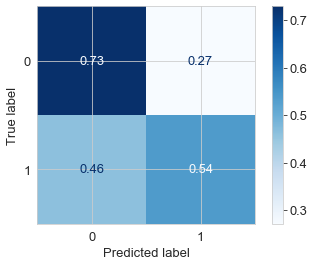

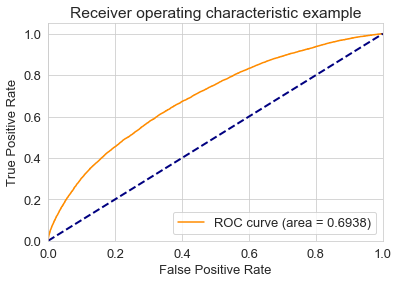

In [16]:
#best_lr = cv.best_estimator_

best_lr = cb.CatBoostClassifier(random_state = 42, min_data_in_leaf = 1, 
                               verbose = 1, one_hot_max_size = 9, learning_rate = 0.06, 
                               cat_features= cat_index_t, n_estimators = 750, l2_leaf_reg = 25,
                                max_depth = 6, rsm = 0.6, subsample = 0.7 )
best_lr.fit(X_train_sc,y_train)

#Predicting for testing and trainig data sets
y_test_proba = best_lr.predict_proba(X_test_sc)[:,1]
y_train_proba = best_lr.predict_proba(X_train_sc)[:,1]

y_pred_test = best_lr.predict(X_test_sc)
y_pred_train = best_lr.predict(X_train_sc)

#Accuracy Score
print("Training accuracy: %0.4f" %best_lr.score(X_train_sc, y_train))
print("Test accuracy    : %0.4f" %best_lr.score(X_test_sc, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(best_lr, X_test_sc, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)


Top 25 Feature Importance


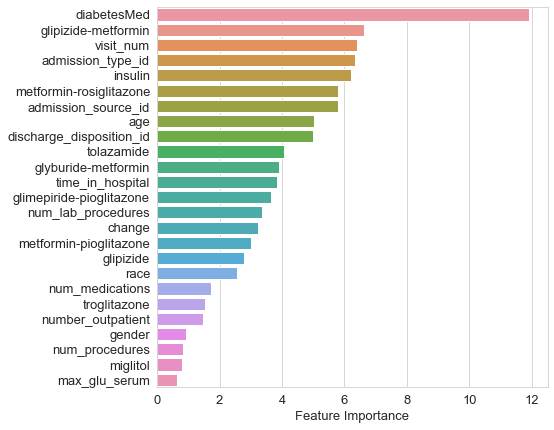

In [21]:
figsize(7,7)

coefficients = best_lr.feature_importances_
coef = pd.DataFrame(coefficients, index = X_train.columns, columns = ['Feature Importance'])
coef.sort_values('Feature Importance', ascending = False, inplace = True)
print("Top 25 Feature Importance")
_ = sns.barplot(data = coef[:25], x = 'Feature Importance', y = coef[:25].index, orient = 'h')
#_ = plt.barh(coef[:10].index, coef['Feature Importance'][:20])

In [26]:
from sklearn.metrics import precision_recall_curve

def pr_auc_curve(y_test,y_pred_test,auc_test):
    precision,recall, threshold = precision_recall_curve(y_test, y_pred_test)
    _ = plt.plot(recall, precision, color='darkorange', label='ROC curve (area = %0.4f)' %auc_test )
    _ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    _ = plt.xlim([0.0, 1.0])
    _ = plt.ylim([0.0, 1.05])
    _ = plt.xlabel('Recall')
    _ = plt.ylabel('Precision')
    _ = plt.title('Receiver operating characteristic example')
    _ = plt.legend(loc="lower right")

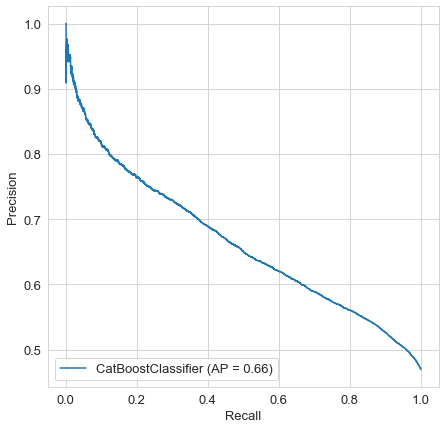

In [28]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(best_lr, X_test_sc, y_test)